In [23]:
import pandas as pd
import string
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure



from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [10]:
questions_df = pd.read_csv("./data/labelled_questions.csv")

In [15]:
questions_df['tokenized'] = questions_df["question_text"].apply(word_tokenize)

In [21]:
questions_df["length"] = questions_df["tokenized"].apply(len)

In [32]:
length_0 = questions_df.iloc[np.where(questions_df["target"] == 0)]["length"]
length_1 = questions_df.iloc[np.where(questions_df["target"] == 1)]["length"]

{'whiskers': [<matplotlib.lines.Line2D at 0x1aa1f6810>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa2000d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa1f6450>,
 'medians': [<matplotlib.lines.Line2D at 0x1aa200990>,
 'fliers': [<matplotlib.lines.Line2D at 0x1aa200dd0>,
 'means': []}

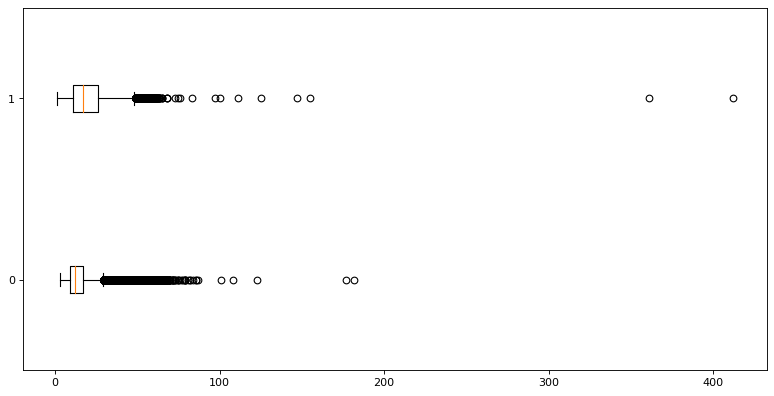

In [43]:
figure(figsize=(12, 6), dpi=80)
plt.boxplot([length_0, length_1], vert = False, labels=["0", "1"])

<AxesSubplot:ylabel='Count'>

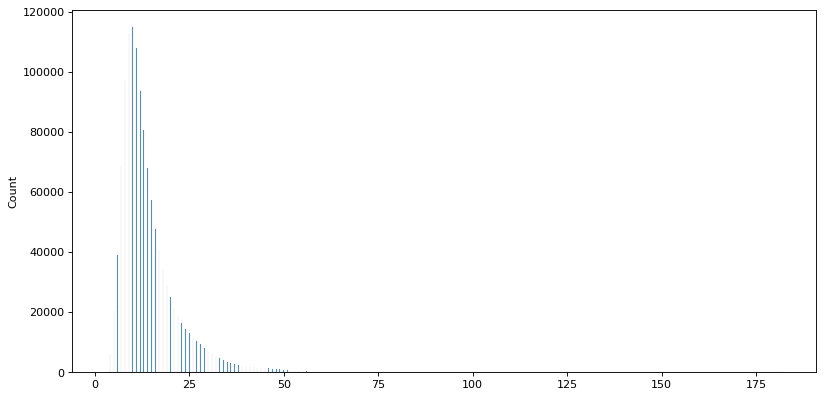

In [56]:
figure(figsize=(12, 6), dpi=80)
sns.histplot(np.array(length_0))

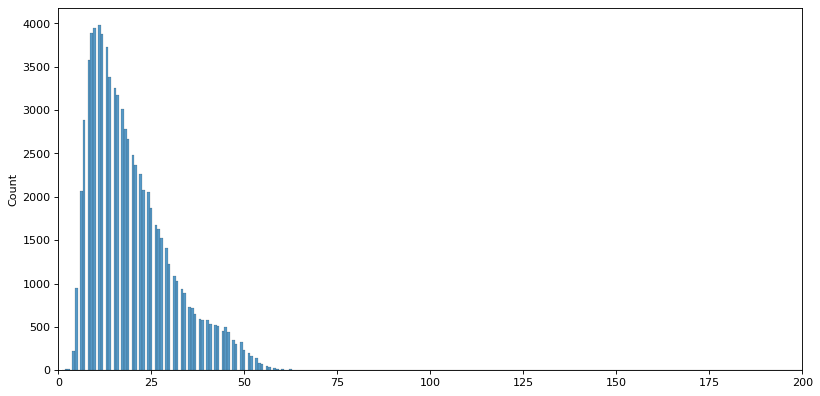

In [62]:
figure(figsize=(12, 6), dpi=80)
sns.histplot(np.array(length_1)).set(xlim=(0,200))
plt.show()

In [71]:
print("Avg for sincere questions: \t" + str(np.mean(length_0)))
print("Avg for insincere questions: \t" + str(np.mean(length_1)))
print("Max length for sincere questions: \t" + str(np.max(length_0)))
print("Max length for insincere questions: \t" + str(np.max(length_1)))
print("Min length for sincere questions: \t" + str(np.min(length_0)))
print("Min length for insincere questions: \t" + str(np.min(length_1)))
print("Median length for sincere questions: \t" + str(np.median(length_0)))
print("Median length for insincere questions: \t" + str(np.median(length_0)))

Avg for sincere questions: 	14.111272067848843
Avg for insincere questions: 	19.593664150476425
Max length for sincere questions: 	182
Max length for insincere questions: 	412
Min length for sincere questions: 	3
Min length for insincere questions: 	1
Median length for sincere questions: 	12.0
Median length for insincere questions: 	12.0


In [95]:
tokens = list(np.concatenate(questions_df["tokenized"], axis=0))

In [98]:
from collections import Counter
tokenCounter = Counter(tokens)

In [93]:
Counter.most_common(60)

[('?', 1381192),
 ('the', 654999),
 ('What', 432487),
 ('to', 405759),
 ('a', 403687),
 ('in', 366616),
 ('is', 335670),
 ('of', 332817),
 ('I', 329018),
 ('How', 263042),
 ('and', 252933),
 (',', 231447),
 ('do', 228247),
 ('are', 215408),
 ('for', 201839),
 ('you', 200286),
 ('Why', 145107),
 ('it', 140297),
 ('can', 126790),
 ('Is', 110188),
 ('that', 107342),
 ('my', 104274),
 ('.', 95996),
 ('with', 94439),
 ('on', 93331),
 ('be', 91501),
 ('or', 91245),
 ('have', 86522),
 ("'s", 70157),
 ('does', 69010),
 ('from', 68497),
 ('your', 67260),
 ('an', 66873),
 ('if', 64005),
 ('get', 62456),
 ('best', 62267),
 ('(', 56618),
 (')', 56594),
 ('as', 55700),
 ('people', 55508)]

In [99]:
# More cleaning 

def clean(sentence):
    x = sentence.lower()
    x = re.sub(r'https?:\/\/.*[\r\n]*', '', x)
    x = re.sub(r'http?:\/\/.*[\r\n]*', '', x)
    x = x.replace(r'&amp;?', r'and')
    x = x.replace(r'&lt;', r'<')
    x = x.replace(r'&gt;', r'>')
    x = re.sub(r"(?:\@)\w+", '', x)
    x = x.encode("ascii", errors="ignore").decode()
    x = re.sub(r'[:"#$%&\*+,-/:;<=>@\\^_`{|}~]+', '', x)
    x = re.sub(r'[!]+', '!', x)
    x = re.sub(r'[?]+', '?', x)
    x = re.sub(r'[.]+', '.', x)
    x = re.sub(r"'", "", x)
    x = re.sub(r"\(", "", x)
    x = re.sub(r"\)", "", x)
    
    tokenized_word = word_tokenize(x)
    ps = PorterStemmer()
    stemmed_words=[]
    
    for word in tokenized_word:
        stemmed_words.append(ps.stem(word))

    text = ' '.join(stemmed_words)

    return text


questions_df["clean_tokenized"] = questions_df["question_text"].apply(lambda x: clean(x))

In [100]:
questions_df.to_csv("./data/labelled_clean_questions.csv", index=False)